# Predicting Kyphosis Disorder Using Decision Trees and Random Forest

## Problem Overview

Kyphosis is a spinal disorder in which an excessive outward curve of the spine results in an abnormal rounding of the upper back. The condition is sometimes known as "roundback" or—in the case of a severe curve—as "hunchback." Kyphosis can occur at any age, but is common during adolescence. There are many patients who get operated for kyphosis and even after the operation the disorder may be present. 

So the problem at hand is to predict looking at the various factors of the patient whether the patient still has kyphosis disorder after the operation or not. 

Since it is a classification problem, a good way to approach this problem is by Decision Trees and Random Forest algorithms

The data is stored in a file named Kyphosis.csv

## Import Libraries

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

## Dataset Details

The dataset contains the following columns:

- Kyphosis: This column represents that the patient had kyphosis and had a corrected spinal surgery operation. So this column basically tells whether the kyphosis condition was present or absent after the operation
- Age: Age of the patient in months (The dataset is a children dataset)
- Number: Number of vertebrae involved in the operation
- Start: Number of the first or topmost vertebrae that was operated on

In [4]:
data=pd.read_csv('kyphosis.csv')

In [5]:
data.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
Kyphosis    81 non-null object
Age         81 non-null int64
Number      81 non-null int64
Start       81 non-null int64
dtypes: int64(3), object(1)
memory usage: 2.6+ KB


In [7]:
data.shape

(81, 4)

In [8]:
data.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


## Exploratory Data Analysis

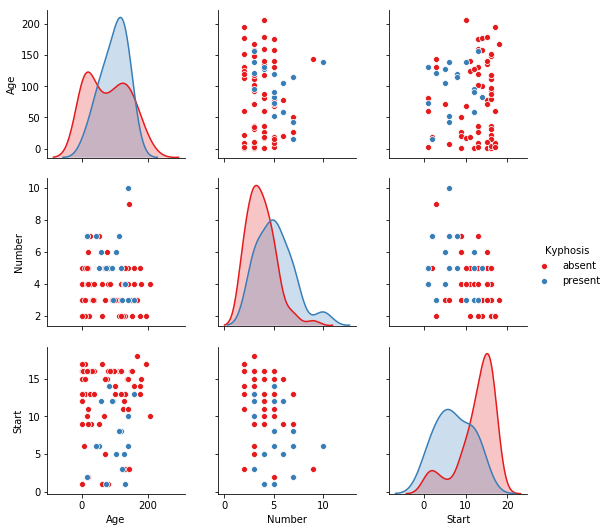

In [10]:
sns.pairplot(data,hue='Kyphosis',palette='Set1')

## Training the Decision Tree and Random Forest Model

### Dividing the Data into Features and Labels

We will train out model on the training set and then use the test set to evaluate the model.

In [12]:
X = data.drop('Kyphosis',axis=1)
y = data['Kyphosis']

### Train Test Split

- Once the features and the labels are decided, the data is to be divided into training data and testing data
- The model will be trained on the training set and then the test set will be used to evaluate the model

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Decision Tree

### Creating and Training Decision Tree Model

In [16]:
from sklearn.tree import DecisionTreeClassifier

In [18]:
# Instantiating Decision Tree model (basically creating a decision tree object)

In [17]:
dtree = DecisionTreeClassifier()

In [19]:
# Training or fitting the model on training data

In [20]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### Predictions

In [25]:
predictions = dtree.predict(X_test)

### Decision Tree Model Evaluation

In [27]:
from sklearn.metrics import classification_report, confusion_matrix

In [28]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      absent       0.84      0.80      0.82        20
     present       0.33      0.40      0.36         5

   micro avg       0.72      0.72      0.72        25
   macro avg       0.59      0.60      0.59        25
weighted avg       0.74      0.72      0.73        25



In [29]:
print(confusion_matrix(y_test,predictions))

[[16  4]
 [ 3  2]]


### Tree Visualization

In [41]:
features = list(data.columns[1:])
features

['Age', 'Number', 'Start']

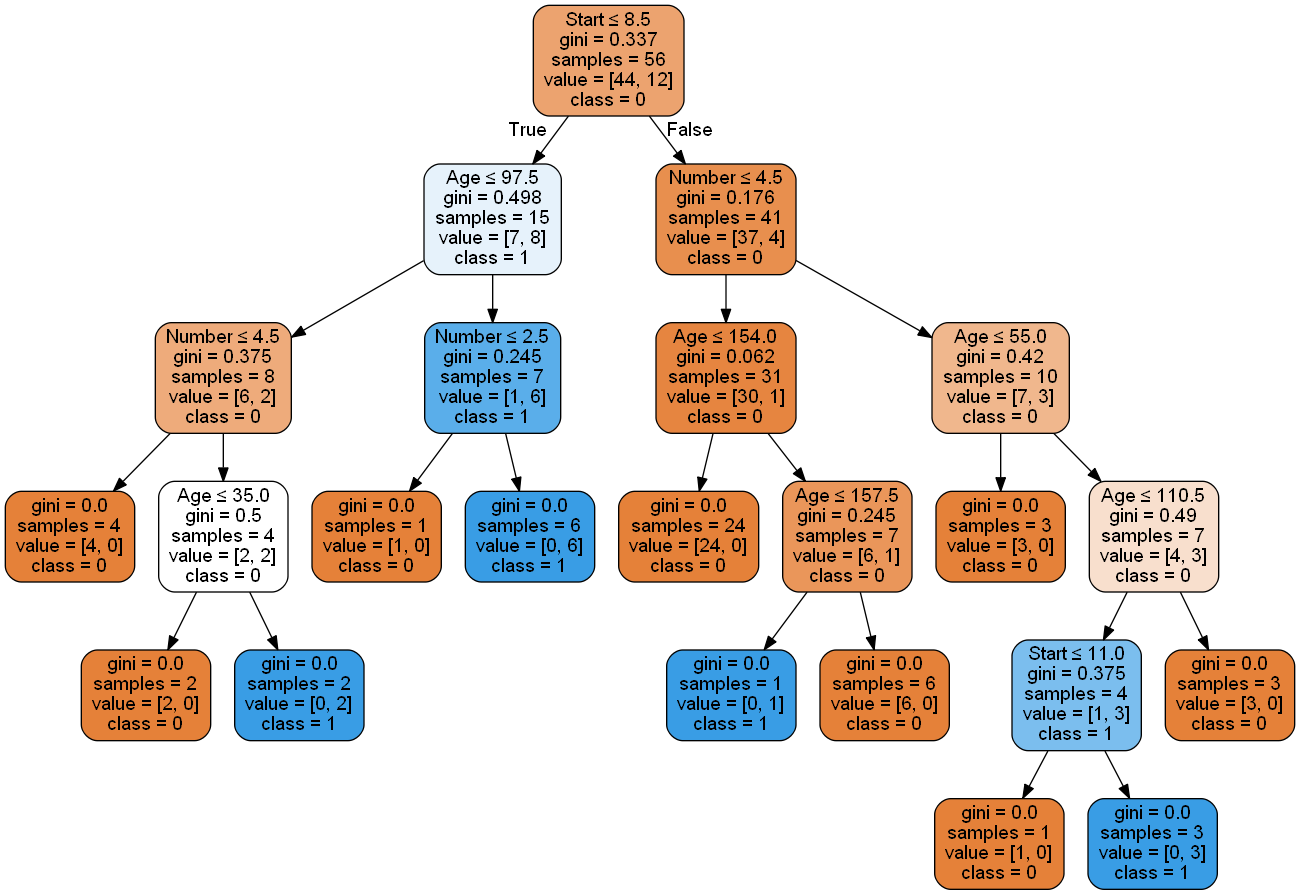

In [42]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = features,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('kyphosis.png')
Image(graph.create_png())

## Random Forest

### Creating and Training Random Forest Model

In [23]:
from sklearn.ensemble import RandomForestClassifier

In [21]:
# Instantiating Random Forest model (basically creating a random forest object)

In [31]:
rfc = RandomForestClassifier(n_estimators=200)

In [36]:
# Training or fitting the model on training data

In [32]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

### Predictions

In [33]:
rfc_predictions = rfc.predict(X_test)

### Random Forest Model Evaluation

In [35]:
print(classification_report(y_test,rfc_predictions))

              precision    recall  f1-score   support

      absent       0.81      0.85      0.83        20
     present       0.25      0.20      0.22         5

   micro avg       0.72      0.72      0.72        25
   macro avg       0.53      0.53      0.53        25
weighted avg       0.70      0.72      0.71        25



In [34]:
print(confusion_matrix(y_test,rfc_predictions))

[[17  3]
 [ 4  1]]
